2024-10-25 12:56:38.371532: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-25 12:56:39.697717: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-25 12:56:40.542420: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-25 12:56:41.334891: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-25 12:56:41.577358: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-25 12:56:42.846099: I tensorflow/core/platform/cpu_feature_gu

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


/home/keyan/Downloads/PNEUMONIA_DETECTION-main/Flask Application/project/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/keyan/Downloads/PNEUMONIA_DETECTION-main/Flask Application/project/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/18
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7471 - loss: 0.5667

/home/keyan/Downloads/PNEUMONIA_DETECTION-main/Flask Application/project/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.7475 - loss: 0.5657 - val_accuracy: 0.8125 - val_loss: 0.5323
Epoch 2/18
163/163 ━━━━━━━━━━━━━━━━━━━━ 273s 2s/step - accuracy: 0.8869 - loss: 0.2630 - val_accuracy: 0.6875 - val_loss: 0.8425
Epoch 3/18
163/163 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.9080 - loss: 0.2291 - val_accuracy: 0.8750 - val_loss: 0.4602
Epoch 4/18
163/163 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.9241 - loss: 0.1967 - val_accuracy: 0.7500 - val_loss: 0.8410
Epoch 5/18
163/163 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.9311 - loss: 0.1798 - val_accuracy: 0.7500 - val_loss: 0.6570
Epoch 6/18
163/163 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.9229 - loss: 0.1870 - val_accuracy: 0.6250 - val_loss: 0.7893
Epoch 7/18
163/163 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.9355 - loss: 0.1560 - val_accuracy: 0.8125 - val_loss: 0.4982
Epoch 8/18
163/163 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.9311 - loss: 0.1866 - val_accuracy: 0.687

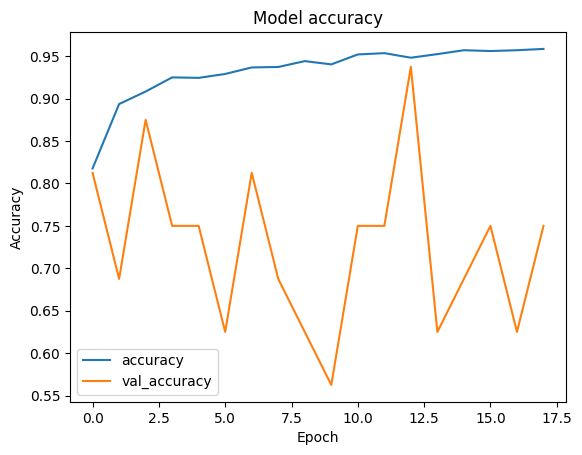

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define directories for training, validation, and testing data
train_dir = '/home/keyan/Music/chest_xray/chest_xray/train'
val_dir = '/home/keyan/Music/chest_xray/chest_xray/val'
test_dir = '/home/keyan/Music/chest_xray/chest_xray/test'

# Image size and batch size
img_size = 150
batch_size = 32

# ImageDataGenerator for loading and augmenting images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directory and prepare for training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'  # Binary classification (Pneumonia or Normal)
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)

# Building the CNN model from scratch
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers to connect to dense layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=18,  # Adjust the number of epochs for better results
)

# Save the trained model
model.save('/home/keyan/model/pneumonia_detection_model_18.h5')

# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [5]:
import cv2

def calculate_affected_area(img_path):
    """
    This function calculates the affected area of the lung in a given X-ray image.
    
    img_path: Path to the X-ray image.
    """
    # Read the image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to 150x150 (same size as the model input)
    img = cv2.resize(img, (img_size, img_size))

    # Apply binary threshold to highlight lung region (simplified method)
    _, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # Calculate the total and affected area
    total_pixels = binary_img.size
    affected_pixels = np.sum(binary_img == 255)  # White regions are considered affected
    
    # Calculate the percentage of lung affected
    affected_percentage = (affected_pixels / total_pixels) * 100
    
    return affected_percentage

# Example usage
img_path = '/home/keyan/Music/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg'
affected_area_percentage = calculate_affected_area(img_path)
print(affected_area_percentage)
print(f"Lung affected area: {affected_area_percentage:.2f}%")


70.67555555555556
Lung affected area: 70.68%


In [3]:
import cv2

def calculate_affected_area(img_path):
    """
    This function calculates the affected area of the lung in a given X-ray image.
    
    img_path: Path to the X-ray image.
    """
    # Read the image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to 150x150 (same size as the model input)
    img = cv2.resize(img, (img_size, img_size))

    # Apply binary threshold to highlight lung region (simplified method)
    _, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    # Calculate the total and affected area
    total_pixels = binary_img.size
    affected_pixels = np.sum(binary_img == 255)  # White regions are considered affected
    
    # Calculate the percentage of lung affected
    affected_percentage = (affected_pixels / total_pixels) * 100
    
    return affected_percentage

# Example usage
img_path = '/home/keyan/Music/chest_xray/chest_xray/test/PNEUMONIA/person25_virus_59.jpeg'
affected_area_percentage = calculate_affected_area(img_path)
print(f"Lung affected area: {affected_area_percentage:.2f}%")


Lung affected area: 69.33%


In [19]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_pneumonia_and_calculate_area(model, img_path):
    """
    Predicts if pneumonia is present in the X-ray and calculates the affected lung area.
    
    model: Trained CNN model.
    img_path: Path to the X-ray image.
    """
    # Load the image
    img = load_img(img_path, target_size=(img_size, img_size))
    img_array = img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Predict if pneumonia is present
    prediction = model.predict(img_array)
    
    if prediction[0] > 0.5:
        print("Pneumonia detected.")
        # Calculate the affected lung area
        affected_area = calculate_affected_area(img_path)
        print(f"Lung affected area: {affected_area:.2f}%")
    else:
        print("No pneumonia detected.")

# Example usage with a test image
test_img_path = '/home/keyan/Music/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg'
model = tf.keras.models.load_model('/home/keyan/model/pneumonia_detection_model.h5')
predict_pneumonia_and_calculate_area(model, test_img_path)
def calculate_severity(affected_percentage):
    if affected_percentage < 30:
        return "Mild"
    elif 30 <= affected_percentage < 60:
        return "Moderate"
    else:
        return "Severe"

# Example usage
severity = calculate_severity(affected_area_percentage)
print(f"Pneumonia severity: {severity}")

def calculate_severity(affected_percentage):
    if affected_percentage < 30:
        return "Mild"
    elif 30 <= affected_percentage < 60:
        return "Moderate"
    else:
        return "Severe"

# Example usage
severity = calculate_severity(affected_area_percentage)
print(f"Pneumonia severity: {severity}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Pneumonia detected.


AttributeError: 'str' object has no attribute 'size'

2024-10-23 22:14:02.693449: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 22:14:04.007944: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 22:14:04.842121: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-23 22:14:05.701961: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-23 22:14:05.865907: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-23 22:14:07.167930: I tensorflow/core/platform/cpu_feature_gu

Lung affected area: 89.88%
